# SEMOS Education_Data Science Institute_Programming in Python


# PROJECT - Predict Length of Stay in Hospitals
## Version 1 - outliers removed, scaled data


# Import neccessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import sklearn.linear_model as LinearRegression
import statsmodels.api as sm

# 1. Load dataset

In [2]:
raw_data = pd.read_csv('Healthcare.Blueprint-Predicting Length of Stay in Hospitals.csv')
raw_data.head()

,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,...,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,lengthofstay,number_of_issues
0,0,F,0,0,0,0,0,0,0,0,...,0.823340,1.684186,-0.161915,1.454965,0.312741,1.936991,0.010963,4,3,0
1,5+,F,0,0,0,0,0,0,0,0,...,-0.386613,-1.596543,-0.470738,-0.779911,-0.671360,-1.068721,0.010963,1,7,0
2,1,F,0,0,0,0,0,0,0,0,...,-1.611147,-0.381186,-0.161915,-0.167779,-0.480071,-0.811089,0.010963,2,3,0
3,0,F,0,0,0,0,0,0,0,0,...,0.367584,0.713958,-0.161915,-0.961187,-0.921644,0.219441,0.010963,1,1,0
4,0,F,0,0,0,1,0,1,0,0,...,0.247842,-1.569599,-0.200518,0.716587,0.226159,-0.553456,-1.572234,2,4,2


# 2. EDA - preprocessing

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   rcount                      100000 non-null  object 
 1   gender                      100000 non-null  object 
 2   dialysisrenalendstage       100000 non-null  int64  
 3   asthma                      100000 non-null  int64  
 4   irondef                     100000 non-null  int64  
 5   pneum                       100000 non-null  int64  
 6   substancedependence         100000 non-null  int64  
 7   psychologicaldisordermajor  100000 non-null  int64  
 8   depress                     100000 non-null  int64  
 9   psychother                  100000 non-null  int64  
 10  fibrosisandother            100000 non-null  int64  
 11  malnutrition                100000 non-null  int64  
 12  hemo                        100000 non-null  int64  
 13  hematocrit     

In [4]:
raw_data.describe(include = "float").round(6)

,hematocrit,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000
std,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005
min,-3.728717,-1.882544,-4.326754,-4.766780,-1.011179,-4.392176,-3.899210,-4.503820,-11.071414
25%,-0.529554,-0.462807,-0.673523,-0.676195,-0.239121,-0.672273,-0.674494,-0.639334,0.010963
50%,-0.037375,-0.145235,-0.001415,0.004173,-0.161915,-0.002925,0.000877,-0.038191,0.010963
75%,0.454803,0.247061,0.673907,0.674081,-0.007503,0.676706,0.674295,0.648828,0.010963
max,5.967206,44.034739,4.499148,4.317059,51.604595,4.673169,4.556204,4.856825,6.167839


In [5]:
raw_data.describe(include = "int")

,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,malnutrition,hemo,secondarydiagnosisnonicd9,lengthofstay,number_of_issues
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000
mean,0.036420,0.035270,0.094940,0.039450,0.063060,0.239040,0.051660,0.049390,0.004790,0.049480,0.080000,2.123310,4.00103,0.743500
std,0.187334,0.184462,0.293134,0.194664,0.243072,0.426499,0.221341,0.216682,0.069044,0.216869,0.271295,2.050641,2.36031,1.097406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.00000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,6.00000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,17.00000,9.000000


#### preliminaren check na linearnost

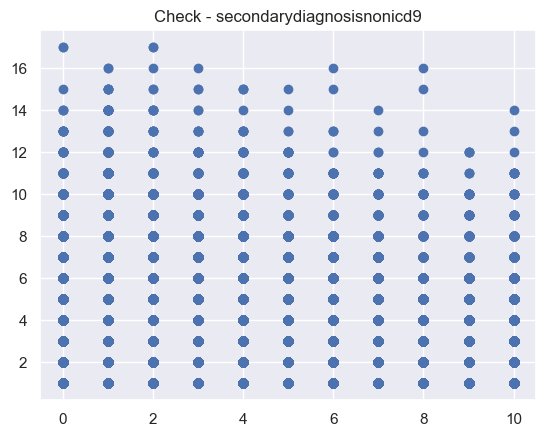

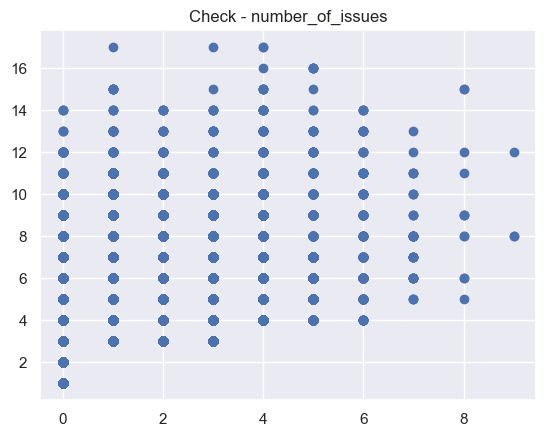

In [6]:
def check_(raw_data):
    num_columns = raw_data[['secondarydiagnosisnonicd9','number_of_issues']]
    for column in num_columns:
        plt.scatter(raw_data[column],raw_data['lengthofstay'])
        plt.title(f'Check - {column}')
        plt.show()
check_(raw_data)


# 3. Exploring the PDF's


##  Detecting outliers, distributions


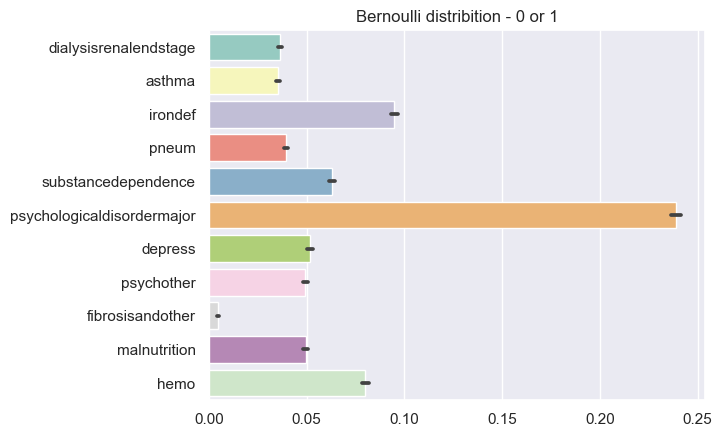

In [7]:
def bern_distributions(raw_data):
    bernoullli_col = raw_data[['dialysisrenalendstage','asthma','irondef','pneum','substancedependence','psychologicaldisordermajor','depress','psychother','fibrosisandother','malnutrition','hemo']]
    sns.barplot(data = bernoullli_col, orient = "h", palette = "Set3")
    plt.title(f'Bernoulli distribition - 0 or 1') # as dummies
    plt.show()

bern_distributions(raw_data)

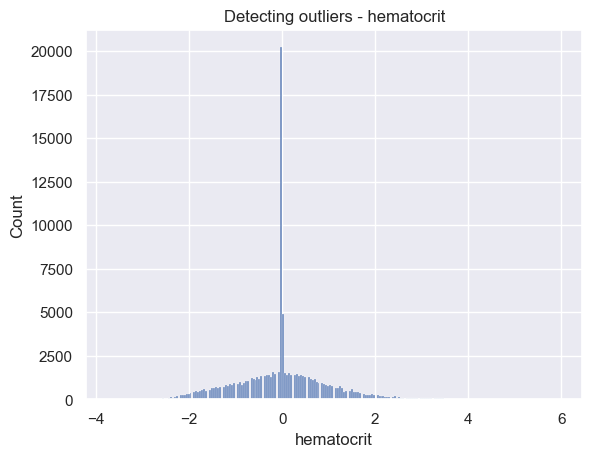

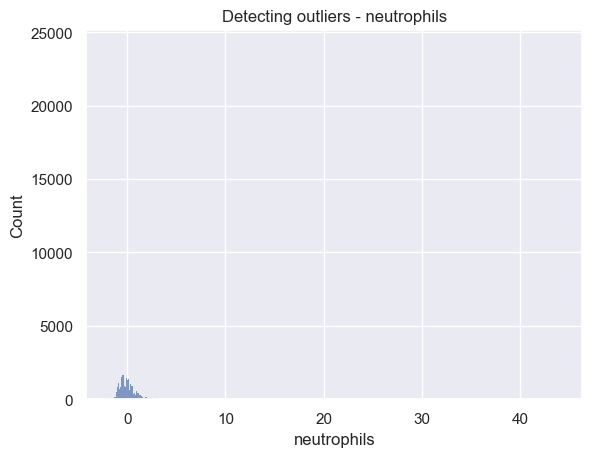

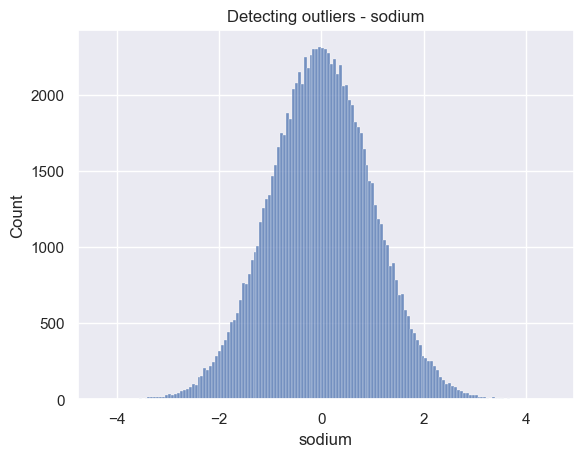

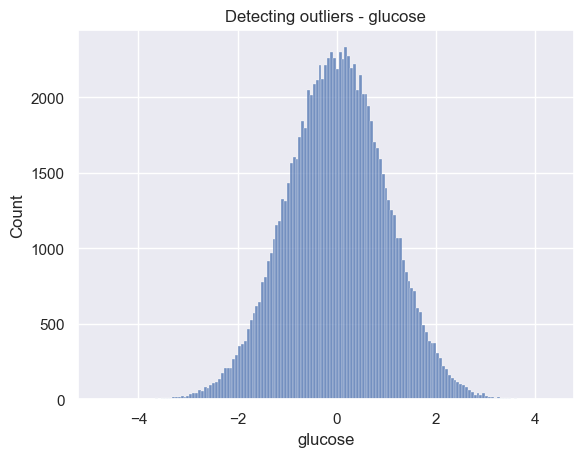

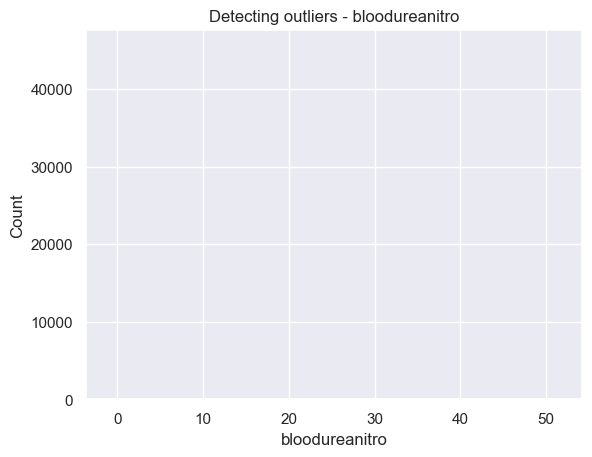

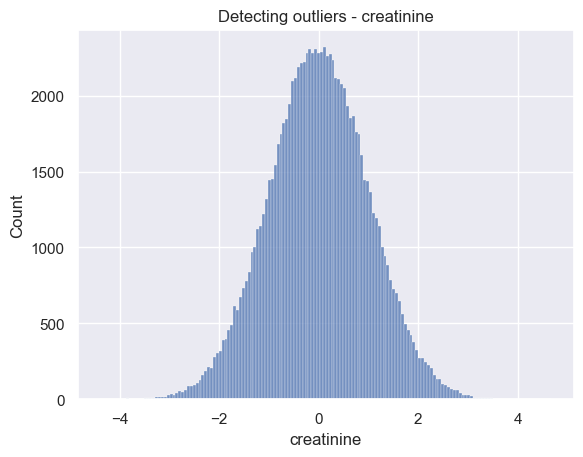

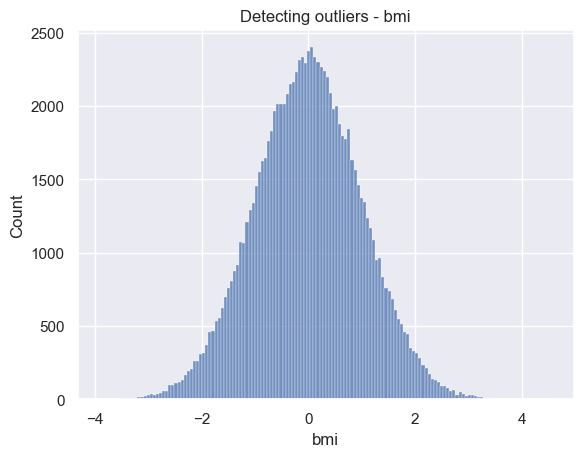

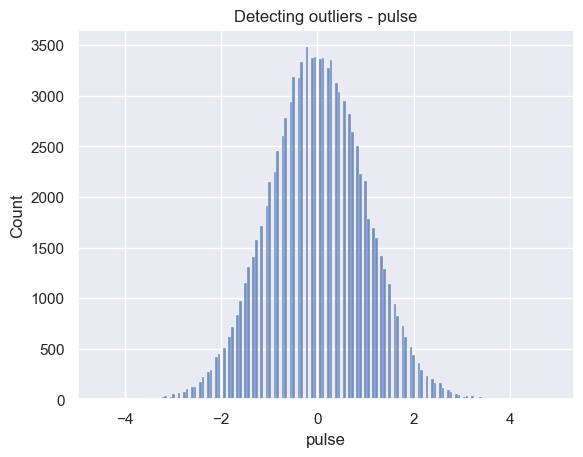

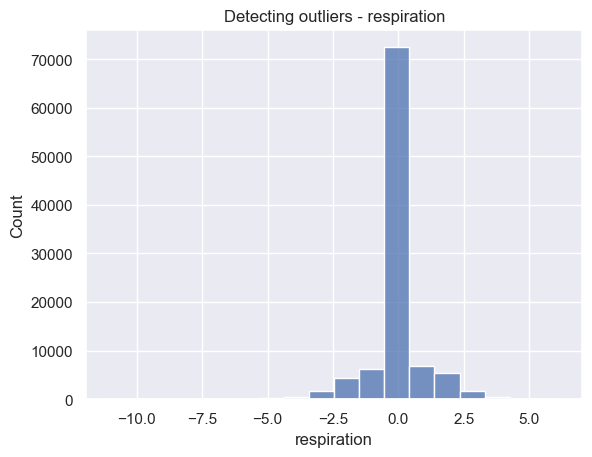

In [8]:
def hist_distribution(raw_data):
    blood_columns = raw_data.select_dtypes(include = ['float64']).columns
    for column in blood_columns:
        sns.histplot(x = raw_data[column])
        plt.title(f'Detecting outliers - {column}') # as distributions
        plt.show()
hist_distribution(raw_data)

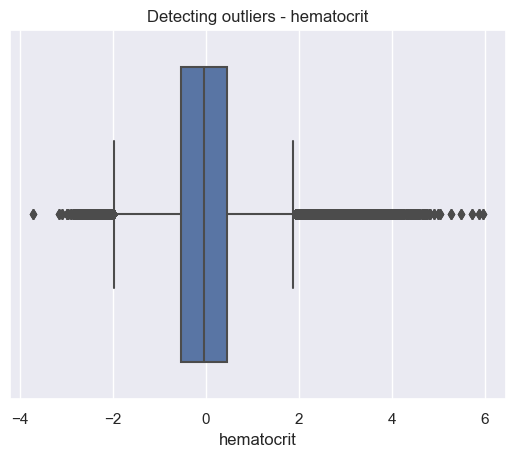

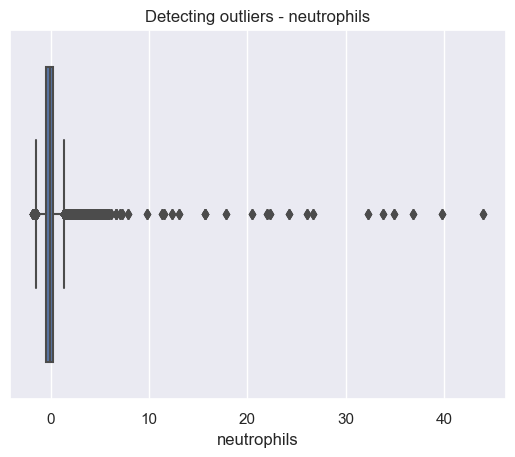

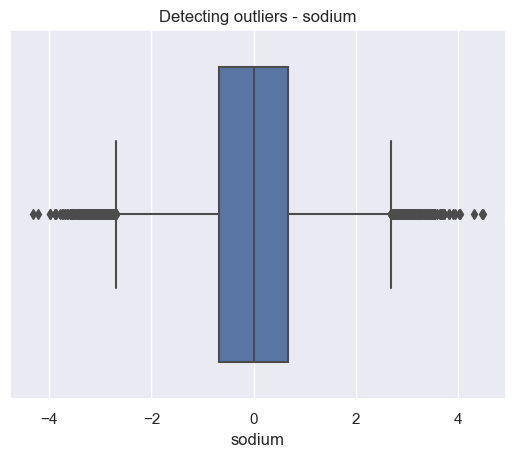

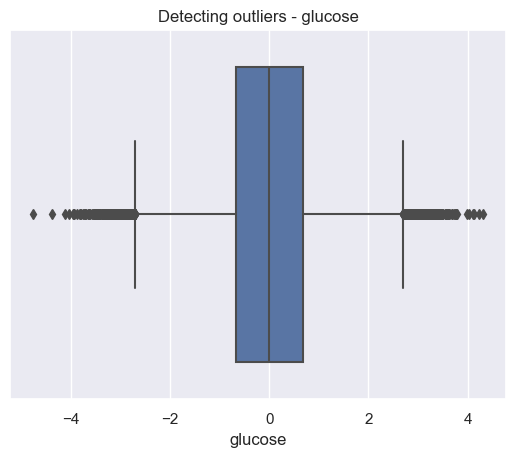

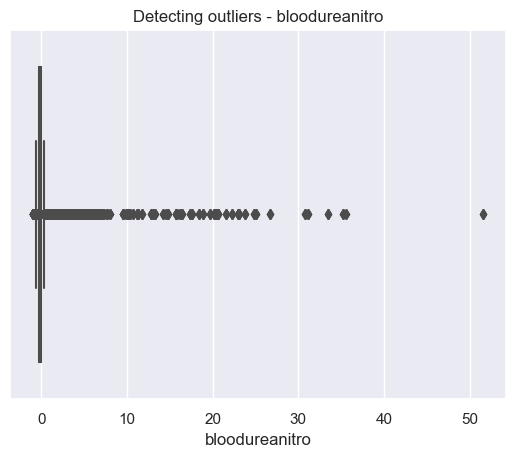

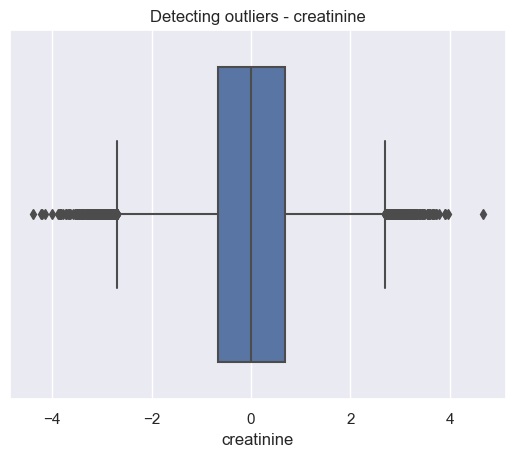

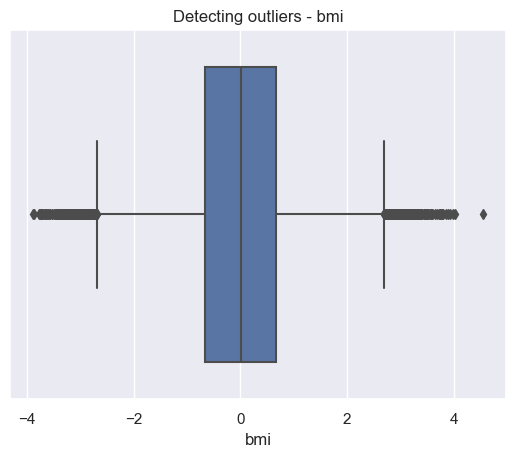

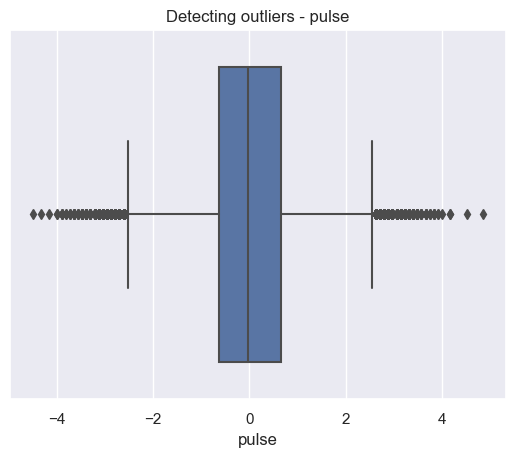

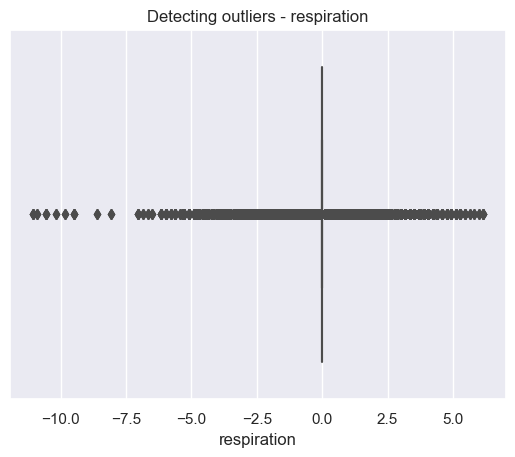

In [9]:
def box_distribution(raw_data):
    blood_columns = raw_data.select_dtypes(include = ['float64']).columns
    for column in blood_columns:
        sns.boxplot(x = raw_data[column])
        plt.title(f'Detecting outliers - {column}') # as distributions
        plt.show()
box_distribution(raw_data)

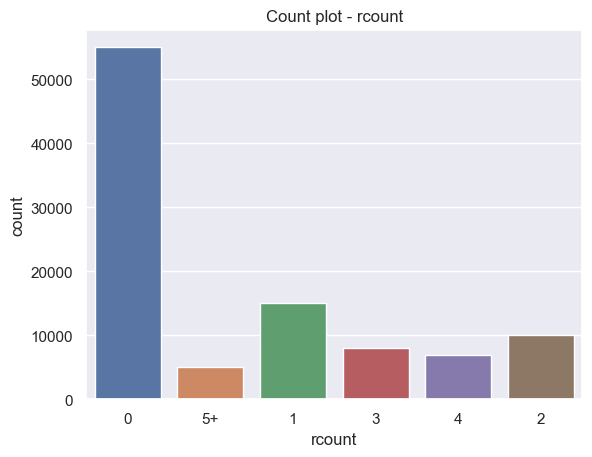

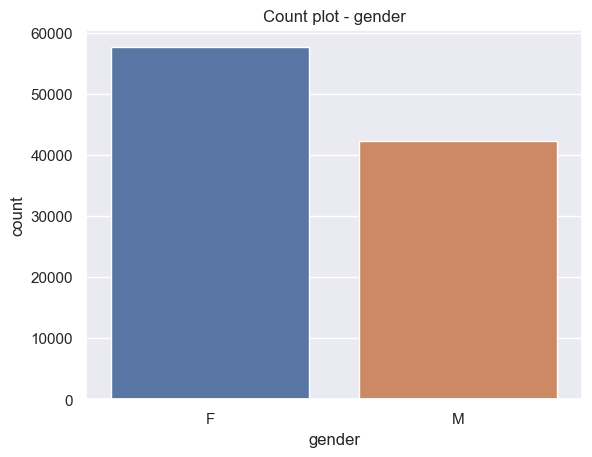

In [10]:
def count_cat(raw_data):
    obj_columns = raw_data.select_dtypes(include = 'object').columns
    for column in obj_columns:
        sns.countplot(x = column, data = raw_data)
        plt.title(f'Count plot - {column}')
        plt.show()
count_cat (raw_data)

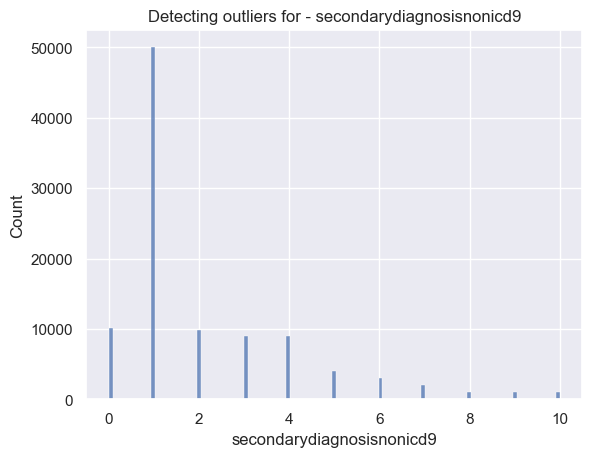

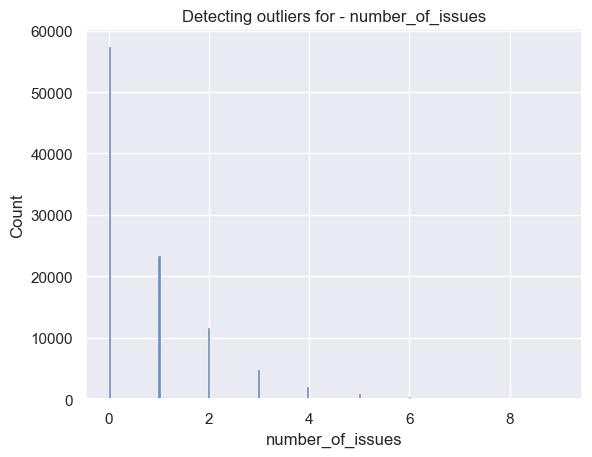

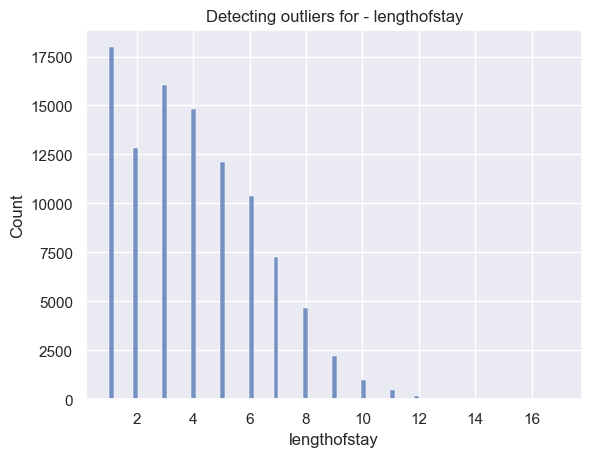

In [11]:
def hist_distribution(raw_data):
    num_columns = raw_data[['secondarydiagnosisnonicd9','number_of_issues','lengthofstay']]
    for column in num_columns:
        sns.histplot(x = raw_data[column])
        plt.title(f'Detecting outliers for - {column}') # descrete values
        plt.show()
hist_distribution(raw_data)

# 4. Dealing with outliers

## 4.1. Dealing with "blood" outliers

In [12]:
raw_data.describe(include = "float").round(6)
# za koloni so normalna distribucija - z-score

,hematocrit,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000
std,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005
min,-3.728717,-1.882544,-4.326754,-4.766780,-1.011179,-4.392176,-3.899210,-4.503820,-11.071414
25%,-0.529554,-0.462807,-0.673523,-0.676195,-0.239121,-0.672273,-0.674494,-0.639334,0.010963
50%,-0.037375,-0.145235,-0.001415,0.004173,-0.161915,-0.002925,0.000877,-0.038191,0.010963
75%,0.454803,0.247061,0.673907,0.674081,-0.007503,0.676706,0.674295,0.648828,0.010963
max,5.967206,44.034739,4.499148,4.317059,51.604595,4.673169,4.556204,4.856825,6.167839


In [13]:
outliers = []
def outliers_zscore(data):
    data=sorted(data)
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score) > thres: 
            outliers.append(i)
    return outliers

In [14]:
neutrophils_outliers = outliers_zscore(raw_data['neutrophils'])
print(len(neutrophils_outliers))    

791


In [15]:
# ne uspeav da gi izbrisam direktno (< 1% se), pa prvo gi zameniv so nan
data1 = raw_data.copy()
for i in neutrophils_outliers:
    data1['neutrophils'] = np.where(data1['neutrophils'] == i, np.nan, data1['neutrophils'])

In [16]:
def delete_nan(data):
    data_cleaned = data1.dropna(axis = 0)
    return data_cleaned
data2 = delete_nan(data1)
data2.describe(include = 'all')

,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,...,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,lengthofstay,number_of_issues
count,99209,99209,99209.000000,99209.000000,99209.000000,99209.00000,99209.000000,99209.000000,99209.000000,99209.000000,...,99209.000000,99209.000000,99209.000000,99209.000000,99209.000000,99209.000000,99209.000000,99209.000000,99209.000000,99209.000000
unique,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,54595,57159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.036438,0.035380,0.095072,0.03917,0.063240,0.240351,0.051951,0.049754,...,0.000062,-0.000211,0.000472,0.000057,0.000445,-0.000445,0.001830,2.123285,3.994406,0.745205
std,NaN,NaN,0.187379,0.184739,0.293316,0.19400,0.243396,0.427299,0.221929,0.217436,...,0.999915,1.000103,1.002691,1.000282,0.999718,0.999745,0.998513,2.050992,2.357472,1.096952
min,NaN,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,-4.326754,-4.766780,-1.011179,-4.392176,-3.899210,-4.503820,-11.071414,0.000000,1.000000,0.000000
25%,NaN,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,-0.673518,-0.676612,-0.239121,-0.672360,-0.673756,-0.639334,0.010963,1.000000,2.000000,0.000000
50%,NaN,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,-0.001409,0.003917,-0.161915,-0.002838,0.001375,-0.038191,0.010963,1.000000,4.000000,0.000000
75%,NaN,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.673843,0.674079,-0.007503,0.676881,0.674285,0.648828,0.010963,3.000000,6.000000,1.000000


In [17]:
data3 = data2.reset_index(drop = True)
data3

,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,...,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,lengthofstay,number_of_issues
0,0,F,0,0,0,0,0,0,0,0,...,0.823340,1.684186,-0.161915,1.454965,0.312741,1.936991,0.010963,4,3,0
1,5+,F,0,0,0,0,0,0,0,0,...,-0.386613,-1.596543,-0.470738,-0.779911,-0.671360,-1.068721,0.010963,1,7,0
2,1,F,0,0,0,0,0,0,0,0,...,-1.611147,-0.381186,-0.161915,-0.167779,-0.480071,-0.811089,0.010963,2,3,0
3,0,F,0,0,0,0,0,0,0,0,...,0.367584,0.713958,-0.161915,-0.961187,-0.921644,0.219441,0.010963,1,1,0
4,0,F,0,0,0,1,0,1,0,0,...,0.247842,-1.569599,-0.200518,0.716587,0.226159,-0.553456,-1.572234,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99204,3,M,0,0,0,0,0,0,0,0,...,-1.759010,0.982207,-0.161915,-2.242209,0.128413,0.562951,0.010963,1,6,0
99205,0,M,0,0,0,0,0,0,0,0,...,0.145324,-0.654187,-0.161915,2.107623,-0.417321,-1.068721,0.010963,1,1,0
99206,1,M,0,0,1,0,0,0,0,0,...,-0.398543,-1.122777,-0.161915,-0.367884,-1.722183,-1.068721,0.714606,1,4,1
99207,0,M,0,0,0,0,0,0,1,0,...,-0.637034,-1.007329,0.146908,-0.319335,-0.305574,-1.240476,-1.572234,1,4,1


In [18]:
bloodureanitro_outliers = outliers_zscore(data3['bloodureanitro'])
print(len(bloodureanitro_outliers))

1753


In [19]:
data4 = data3.copy()
blood_mean = data4['bloodureanitro'].mean()
for i in bloodureanitro_outliers:
    data4['bloodureanitro'] = np.where(data4['bloodureanitro'] == i, blood_mean, data4['bloodureanitro'])


In [20]:
respiration_outliers = outliers_zscore(data4['respiration'])
print(len(respiration_outliers))

3990


In [21]:
data5 = data4.copy() 
respir_mean = data5['respiration'].mean()

for i in respiration_outliers:
    data5['respiration'] = np.where(data5['respiration'] == i, respir_mean, data5['respiration'])

In [22]:
data5.describe(include = 'float')

,hematocrit,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration
count,99209.000000,99209.000000,99209.000000,99209.000000,99209.000000,99209.000000,99209.000000,99209.000000,99209.000000
mean,-0.010975,-0.042476,0.000062,-0.000211,-0.061960,0.000057,0.000445,-0.000445,0.008885
std,0.984166,0.703810,0.999915,1.000103,0.485644,1.000282,0.999718,0.999745,0.809476
min,-3.728717,-1.882544,-4.326754,-4.766780,-1.011179,-4.392176,-3.899210,-4.503820,-2.979520
25%,-0.529554,-0.462807,-0.673518,-0.676612,-0.239121,-0.672360,-0.673756,-0.639334,0.010963
50%,-0.037375,-0.145235,-0.001409,0.003917,-0.161915,-0.002838,0.001375,-0.038191,0.010963
75%,0.454803,0.228380,0.673843,0.674079,-0.007503,0.676881,0.674285,0.648828,0.010963
max,5.967206,2.993131,4.499148,4.317059,3.003524,4.673169,4.556204,4.856825,2.913490


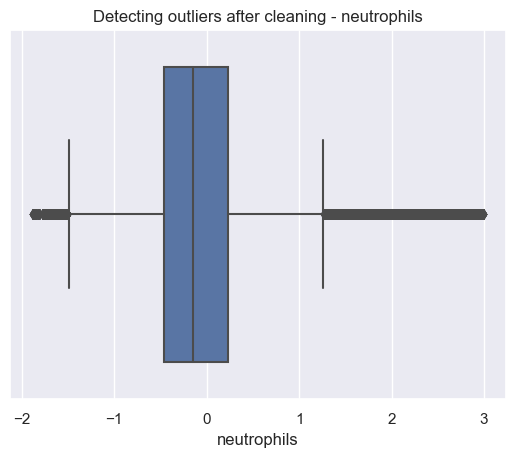

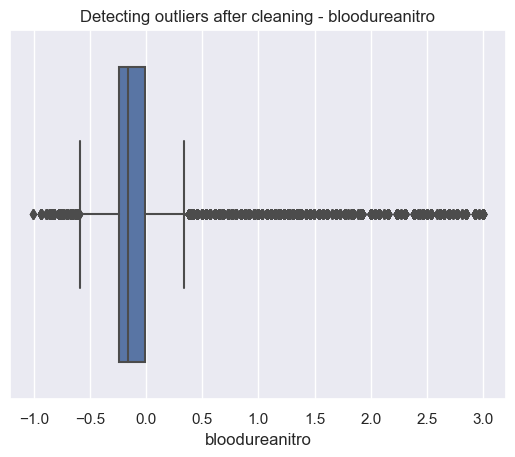

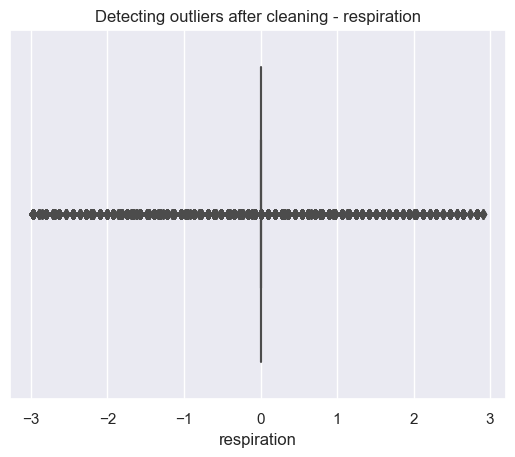

In [23]:
def box_distribution(data):
    blood_columns = data5[['neutrophils', 'bloodureanitro', 'respiration']]
    for column in blood_columns:
        sns.boxplot(x = data5[column])
        plt.title(f'Detecting outliers after cleaning - {column}')
        plt.show()
box_distribution(data5)

## 4.2. Dealing with outliers in descrete numeric columns

In [24]:
num_columns = data5[['secondarydiagnosisnonicd9','number_of_issues','lengthofstay']]
num_columns.describe()    

,secondarydiagnosisnonicd9,number_of_issues,lengthofstay
count,99209.000000,99209.000000,99209.000000
mean,2.123285,0.745205,3.994406
std,2.050992,1.096952,2.357472
min,0.000000,0.000000,1.000000
25%,1.000000,0.000000,2.000000
50%,1.000000,0.000000,4.000000
75%,3.000000,1.000000,6.000000
max,10.000000,9.000000,17.000000


In [25]:
q = data5['secondarydiagnosisnonicd9'].quantile(0.99)
data6 = data5[data5['secondarydiagnosisnonicd9'] < q]

In [26]:
q = data6['number_of_issues'].quantile(0.99)
data7 = data6[data6['number_of_issues'] < q]

In [27]:
q = data7['lengthofstay'].quantile(0.99)
data8 = data7[data7['lengthofstay'] < q]

In [28]:
data_reindexed = data8.reset_index(drop = True)
data_reindexed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95582 entries, 0 to 95581
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   rcount                      95582 non-null  object 
 1   gender                      95582 non-null  object 
 2   dialysisrenalendstage       95582 non-null  int64  
 3   asthma                      95582 non-null  int64  
 4   irondef                     95582 non-null  int64  
 5   pneum                       95582 non-null  int64  
 6   substancedependence         95582 non-null  int64  
 7   psychologicaldisordermajor  95582 non-null  int64  
 8   depress                     95582 non-null  int64  
 9   psychother                  95582 non-null  int64  
 10  fibrosisandother            95582 non-null  int64  
 11  malnutrition                95582 non-null  int64  
 12  hemo                        95582 non-null  int64  
 13  hematocrit                  955

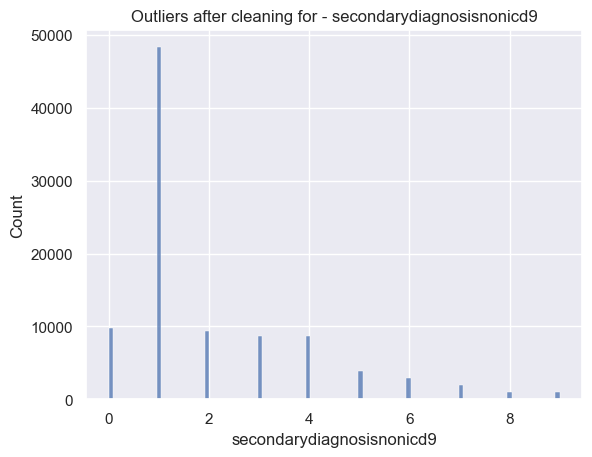

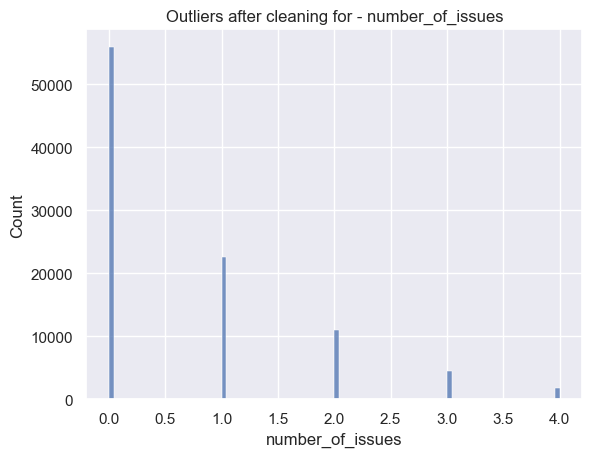

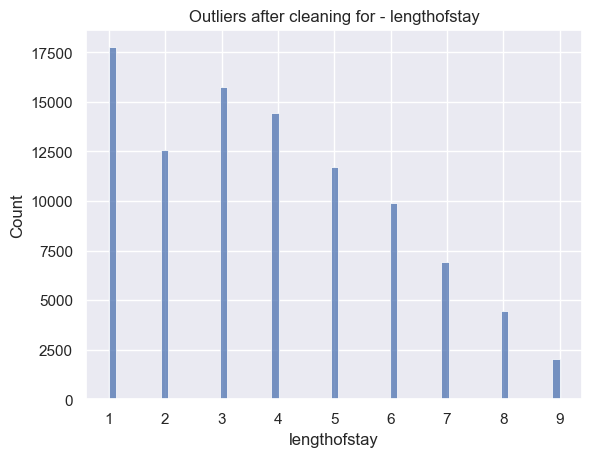

In [29]:
def hist_distribution(data_reindexed):
    num_columns = data_reindexed[['secondarydiagnosisnonicd9','number_of_issues','lengthofstay']]
    for column in num_columns:
        sns.histplot(x = data_reindexed[column])
        plt.title(f'Outliers after cleaning for - {column}')
        plt.show()
hist_distribution(data_reindexed)

In [30]:
data_reindexed

,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,...,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,lengthofstay,number_of_issues
0,0,F,0,0,0,0,0,0,0,0,...,0.823340,1.684186,-0.161915,1.454965,0.312741,1.936991,0.010963,4,3,0
1,5+,F,0,0,0,0,0,0,0,0,...,-0.386613,-1.596543,-0.470738,-0.779911,-0.671360,-1.068721,0.010963,1,7,0
2,1,F,0,0,0,0,0,0,0,0,...,-1.611147,-0.381186,-0.161915,-0.167779,-0.480071,-0.811089,0.010963,2,3,0
3,0,F,0,0,0,0,0,0,0,0,...,0.367584,0.713958,-0.161915,-0.961187,-0.921644,0.219441,0.010963,1,1,0
4,0,F,0,0,0,1,0,1,0,0,...,0.247842,-1.569599,-0.200518,0.716587,0.226159,-0.553456,-1.572234,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95577,3,M,0,0,0,0,0,0,0,0,...,-1.759010,0.982207,-0.161915,-2.242209,0.128413,0.562951,0.010963,1,6,0
95578,0,M,0,0,0,0,0,0,0,0,...,0.145324,-0.654187,-0.161915,2.107623,-0.417321,-1.068721,0.010963,1,1,0
95579,1,M,0,0,1,0,0,0,0,0,...,-0.398543,-1.122777,-0.161915,-0.367884,-1.722183,-1.068721,0.714606,1,4,1
95580,0,M,0,0,0,0,0,0,1,0,...,-0.637034,-1.007329,0.146908,-0.319335,-0.305574,-1.240476,-1.572234,1,4,1


# 5. Remove unsignificant columns

In [31]:
# ?

# 6. Preprocessing data 
## 6.1. Checking the OLS assumptions

## Linearity

Text(0.5, 1.0, 'lengthofstay and number_of_issues')

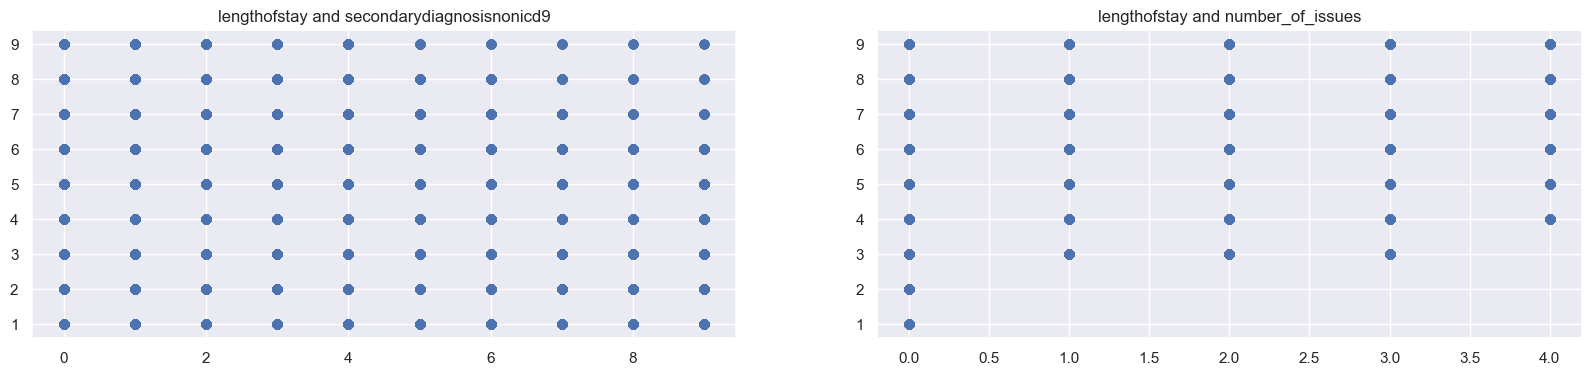

In [32]:
f, (ax1, ax2) = plt.subplots(1,2, figsize =(20, 4)) 
ax1.scatter(data_reindexed['secondarydiagnosisnonicd9'],data_reindexed['lengthofstay'])
ax1.set_title('lengthofstay and secondarydiagnosisnonicd9')
ax2.scatter(data_reindexed['number_of_issues'],data_reindexed['lengthofstay'])
ax2.set_title('lengthofstay and number_of_issues')

# Nema linearna zavisnost?

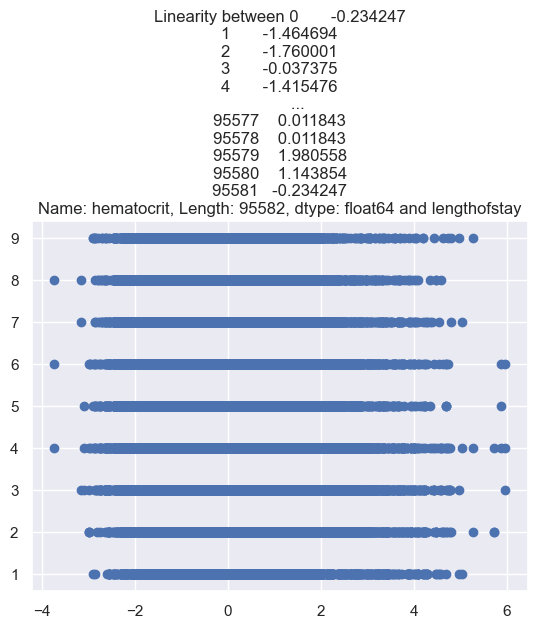

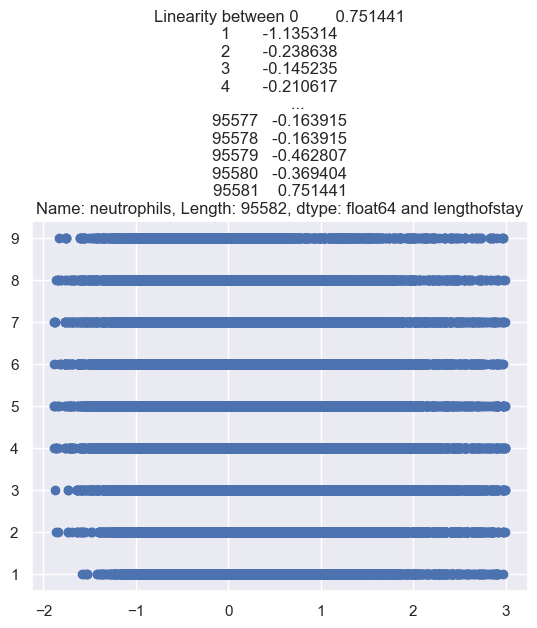

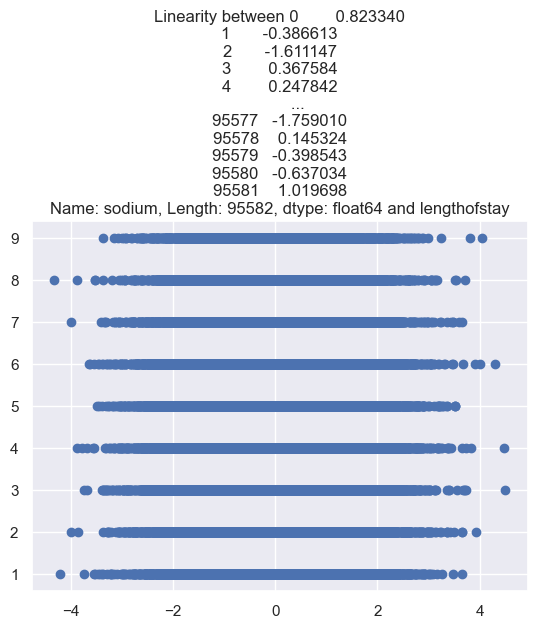

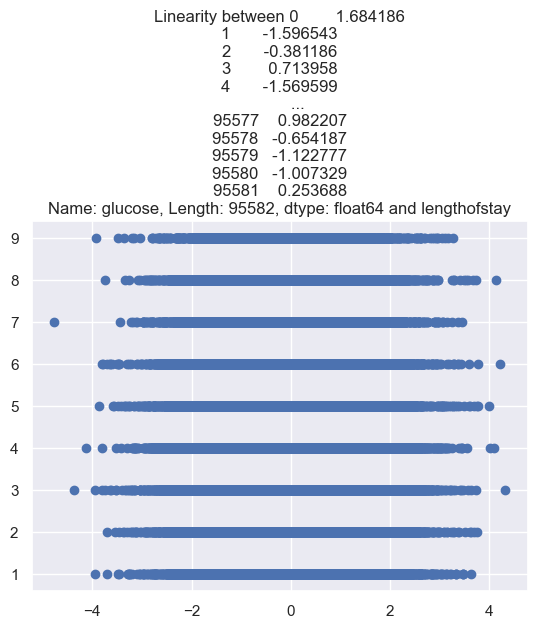

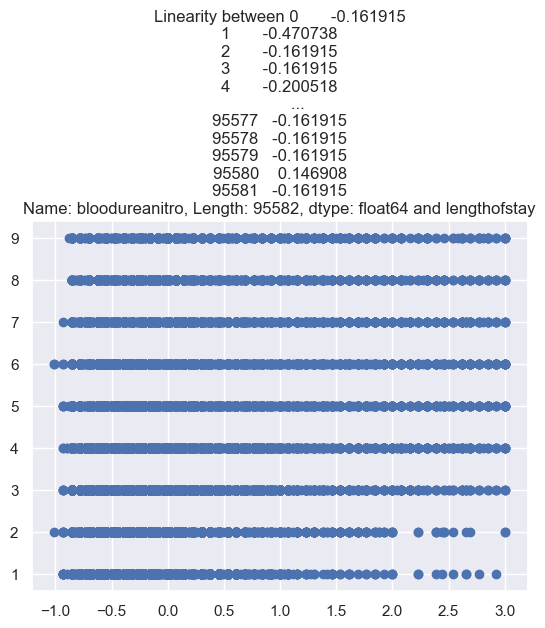

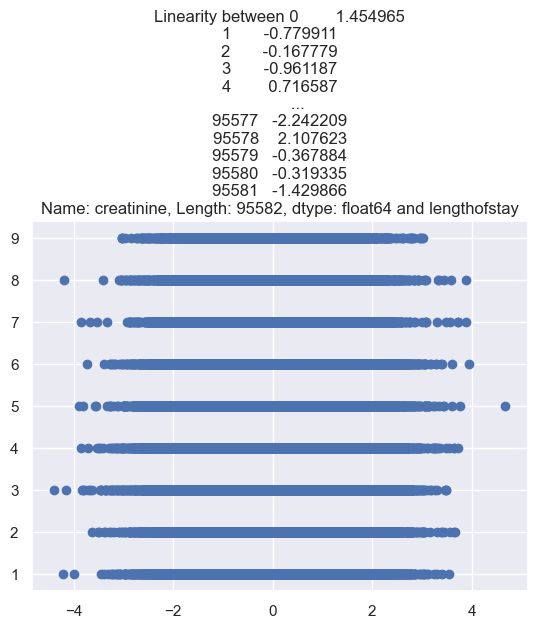

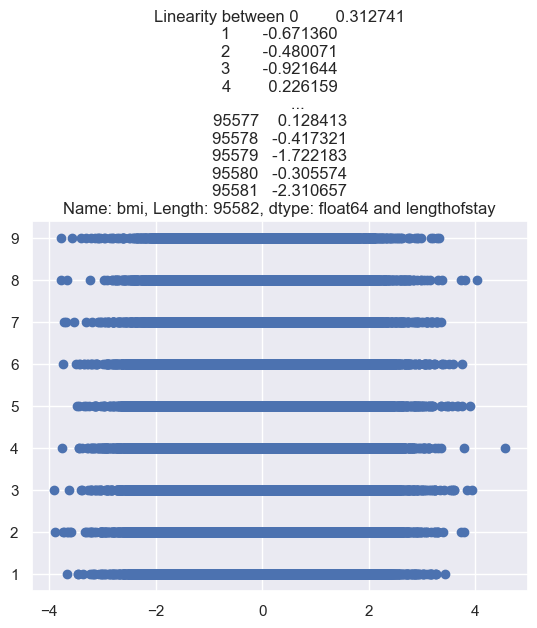

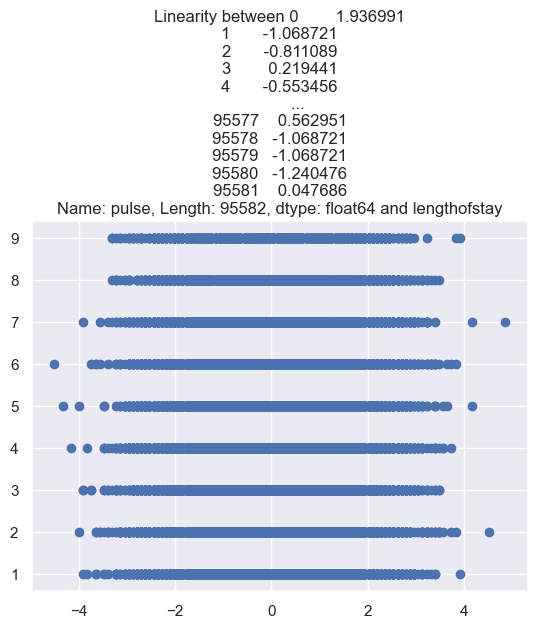

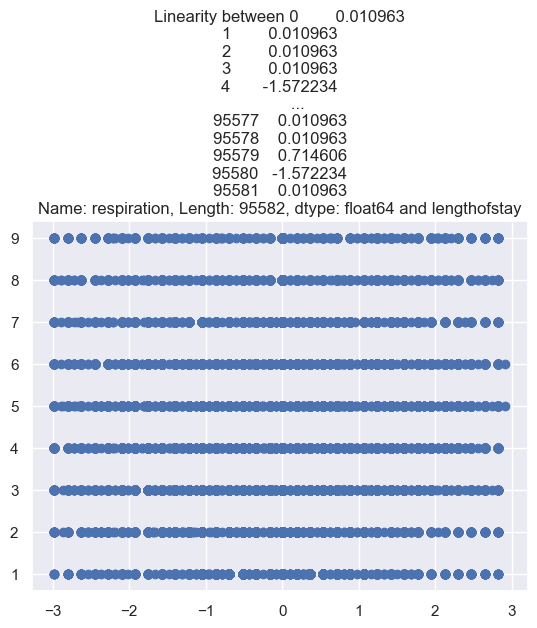

In [33]:
blood_columns = data_reindexed.select_dtypes(include = ['float64'])
for column in blood_columns:
    plt.scatter(blood_columns[column],data_reindexed['lengthofstay'])
    plt.title(f"Linearity between {blood_columns[column]} and lengthofstay")
    plt.show()

## No multicollinearity           

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
def check_multicoll(data, ind_var):
    vif_data = pd.DataFrame()
    vif_data['Variables'] = ind_var
    vif_data['VIF'] = [variance_inflation_factor(data[ind_var].values, i) for i in range(len(ind_var))] 
    return vif_data

In [36]:
ind_var = data_reindexed.select_dtypes(include = "float64").columns
vif_result = check_multicoll(data_reindexed, ind_var)
vif_result

,Variables,VIF
0,hematocrit,1.057430
1,neutrophils,1.026737
2,sodium,1.000078
3,glucose,1.000096
4,bloodureanitro,1.012040
5,creatinine,1.000080
6,bmi,1.000081
7,pulse,1.000115
8,respiration,1.044885


In [37]:
ind_var1 = data_reindexed[['secondarydiagnosisnonicd9', 'number_of_issues']].columns
vif_result = check_multicoll(data_reindexed, ind_var1)
vif_result

,Variables,VIF
0,secondarydiagnosisnonicd9,1.217421
1,number_of_issues,1.217421


## 6.2. Mapping categorical variables

In [38]:
data_mapped = data_reindexed.copy()
data_mapped['gender'] = data_reindexed['gender'].map({'F':1,'M':2})

In [39]:
mapped_data = data_mapped.copy()
mapped_data['rcount'] = data_mapped['rcount'].map({'0':0, '1':1, '2':2,'3':3,'4':4, '5+': 5})

In [40]:
mapped_data.describe(include ='int')

,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,malnutrition,hemo,secondarydiagnosisnonicd9,lengthofstay,number_of_issues
count,95582.000000,95582.000000,95582.000000,95582.000000,95582.000000,95582.000000,95582.000000,95582.000000,95582.000000,95582.000000,95582.000000,95582.000000,95582.000000,95582.000000,95582.000000,95582.000000
mean,1.075014,1.418981,0.028269,0.034871,0.085926,0.033542,0.058484,0.230619,0.049654,0.040311,0.003578,0.040593,0.070944,2.039108,3.854251,0.676791
std,1.503605,0.493395,0.165741,0.183453,0.280257,0.180048,0.234657,0.421231,0.217230,0.196689,0.059710,0.197347,0.256733,1.892741,2.192007,0.971379
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,0.000000
75%,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,5.000000,1.000000
max,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,9.000000,4.000000


## 6.2. Transform target - no linearity

In [ ]:
# log_data = data_reindexed.copy()
# log_length = np.log(log_data['lengthofstay'])
# log_data['lengthofstay_log'] = log_length

In [ ]:
# f, (ax1, ax2) = plt.subplots(1,2, figsize =(20, 4)) 
# ax1.scatter(log_data['secondarydiagnosisnonicd9'],log_data['lengthofstay_log'])
# ax1.set_title('lengthofstay_log and secondarydiagnosisnonicd9')
# ax2.scatter(log_data['number_of_issues'],log_data['lengthofstay_log'])
# ax2.set_title('lengthofstay_log and number_of_issues')

In [ ]:
# exp_data = data_reindexed.copy()
# exp_length = np.exp(exp_data['lengthofstay'])
# exp_data['lengthofstay_exp'] = exp_length

In [ ]:
# f, (ax1, ax2) = plt.subplots(1,2, figsize =(20, 4)) 
# ax1.scatter(exp_data['secondarydiagnosisnonicd9'],exp_data['lengthofstay_exp'])
# ax1.set_title('lengthofstay_exp and secondarydiagnosisnonicd9')
# ax2.scatter(exp_data['number_of_issues'],exp_data['lengthofstay_exp'])
# ax2.set_title('lengthofstay_exp and number_of_issues')

In [ ]:
# f, (ax1, ax2) = plt.subplots(1,2, figsize =(20, 4)) 
# ax1.scatter(exp_data['secondarydiagnosisnonicd9'],exp_data['lengthofstay_exp'])
# ax1.set_title('lengthofstay_exp and secondarydiagnosisnonicd9')
# ax2.scatter(exp_data['number_of_issues'],exp_data['lengthofstay_exp'])
# ax2.set_title('lengthofstay_exp and number_of_issues')

## 6.4. Define predictors and target

In [41]:
prescaled_data = mapped_data.copy()

predictors = prescaled_data.drop(['lengthofstay'], axis = 1)
target = prescaled_data['lengthofstay']


## 6.5. Scale features

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numerical_columns = prescaled_data.select_dtypes(include=['int']).columns
prescaled_data[numerical_columns] = scaler.fit_transform(prescaled_data[numerical_columns])

prescaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95582 entries, 0 to 95581
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   rcount                      95582 non-null  float64
 1   gender                      95582 non-null  float64
 2   dialysisrenalendstage       95582 non-null  float64
 3   asthma                      95582 non-null  float64
 4   irondef                     95582 non-null  float64
 5   pneum                       95582 non-null  float64
 6   substancedependence         95582 non-null  float64
 7   psychologicaldisordermajor  95582 non-null  float64
 8   depress                     95582 non-null  float64
 9   psychother                  95582 non-null  float64
 10  fibrosisandother            95582 non-null  float64
 11  malnutrition                95582 non-null  float64
 12  hemo                        95582 non-null  float64
 13  hematocrit                  955

## 6.6. Split the data

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.2, random_state = 100)

In [45]:
np.random.seed(500)

# 7. Linear regression

In [46]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [47]:
lm = LinearRegression()

In [48]:
import sklearn as linear_model
from sklearn.linear_model import LinearRegression

In [49]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [50]:
y_pred = lm.predict(x_train)

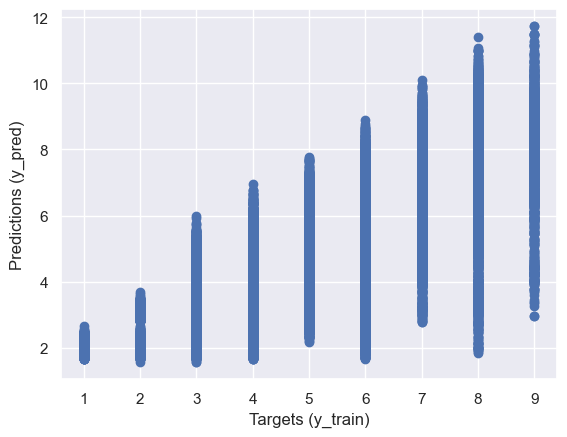

In [51]:
plt.scatter(y_train, y_pred)
plt.xlabel('Targets (y_train)')
plt.ylabel('Predictions (y_pred)')
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

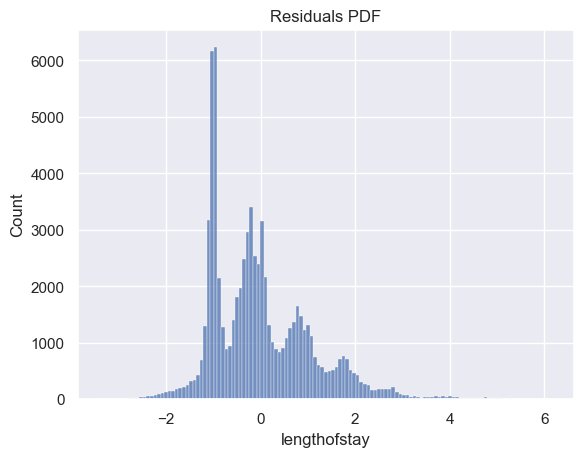

In [52]:
sns.histplot(y_train - y_pred)
plt.title("Residuals PDF")

Histogramot ne pokazuva normalna distribucija na residuals

In [53]:
lm.score(x_train, y_train)

0.7483921425729698

In [54]:
lm2 = lm.score(x_train, y_train)
n = predictors.shape[0]
p = predictors.shape[1]
adj_lm2 = 1 - (1-lm2) * (n-1)/(n-p-1)
adj_lm2


0.7483289489965887

### 7.1. Calculating weights


In [55]:
lm.coef_

array([ 1.11866012e+00,  6.01515314e-02, -9.77871998e+10, -9.77871998e+10,
       -9.77871998e+10, -9.77871998e+10, -9.77871998e+10, -9.77871998e+10,
       -9.77871998e+10, -9.77871998e+10, -9.77871998e+10, -9.77871998e+10,
       -9.77871998e+10,  1.74364364e-02,  1.40403877e-01, -4.83057818e-03,
        4.52431839e-03,  1.81911432e-01,  5.55600206e-05,  5.20155562e-04,
       -5.73219328e-03,  7.86991944e-03, -3.14944969e-04,  9.77871998e+10])

In [56]:
lm.intercept_

1.927775186847878

In [57]:
lm_summary = pd.DataFrame(predictors.columns.values, columns=['Features'])
lm_summary['Weights'] = lm.coef_
lm_summary

,Features,Weights
0,rcount,1.118660e+00
1,gender,6.015153e-02
2,dialysisrenalendstage,-9.778720e+10
3,asthma,-9.778720e+10
4,irondef,-9.778720e+10
5,pneum,-9.778720e+10
6,substancedependence,-9.778720e+10
7,psychologicaldisordermajor,-9.778720e+10
8,depress,-9.778720e+10
9,psychother,-9.778720e+10


# Testing

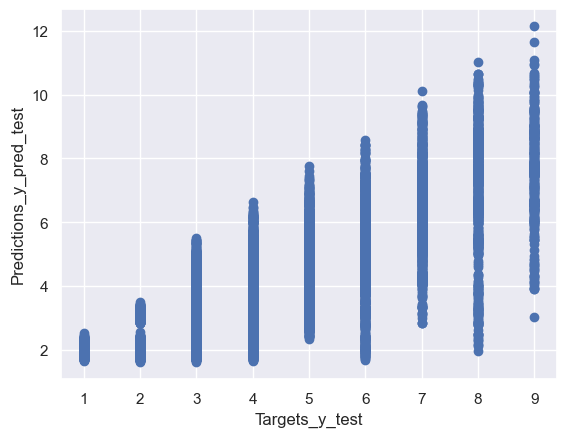

In [58]:
y_pred_test = lm.predict(x_test)
plt.scatter(y_test, y_pred_test)
plt.xlabel("Targets_y_test")
plt.ylabel("Predictions_y_pred_test")
plt.show()

In [59]:
data_pred = pd.DataFrame(y_pred_test.round(0), columns=['Prediction'])
data_pred.head()

,Prediction
0,4.0
1,3.0
2,3.0
3,8.0
4,2.0


In [60]:
data_pred['Target'] = y_test
data_pred

,Prediction,Target
0,4.0,NaN
1,3.0,NaN
2,3.0,NaN
3,8.0,NaN
4,2.0,NaN
...,...,...
19112,2.0,NaN
19113,2.0,NaN
19114,3.0,3.0
19115,5.0,7.0


In [61]:
y_test = y_test.reset_index(drop = True)

In [62]:
y_test.head()

0    3
1    3
2    3
3    6
4    2
Name: lengthofstay, dtype: int64

In [63]:
data_pred['Target'] = y_test
data_pred['Residual'] = data_pred['Prediction'] - data_pred['Target']
data_pred['% Difference'] = np.abs(data_pred['Residual']/(data_pred['Target']*100))
data_pred

,Prediction,Target,Residual,% Difference
0,4.0,3,1.0,0.003333
1,3.0,3,0.0,0.000000
2,3.0,3,0.0,0.000000
3,8.0,6,2.0,0.003333
4,2.0,2,0.0,0.000000
...,...,...,...,...
19112,2.0,2,0.0,0.000000
19113,2.0,1,1.0,0.010000
19114,3.0,5,-2.0,0.004000
19115,5.0,7,-2.0,0.002857



## Predvidenite rezultati malku se razlikuvaat od actual, i pokraj nelinearnosta??

In [64]:
data_pred.describe(include = 'all')

,Prediction,Target,Residual,% Difference
count,19117.000000,19117.000000,19117.000000,19117.000000
mean,3.802532,3.847309,-0.044777,0.003270
std,1.891429,2.183362,1.135230,0.003619
min,2.000000,1.000000,-6.000000,0.000000
25%,2.000000,2.000000,-1.000000,0.000000
50%,3.000000,4.000000,0.000000,0.002000
75%,5.000000,5.000000,1.000000,0.005000
max,12.000000,9.000000,3.000000,0.020000
